# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Laura Dooley 
https://github.com/Ldooley32/web-scraping-dooley



Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsons

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# URL of the archived webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content
    article_html = response.text
    
    # Save the HTML content to a .pkl file
    file_path = "article_html.pkl"
    with open(file_path, "wb") as file:
        pickle.dump(article_html, file)
    
    print(f"HTML content successfully saved to {file_path}")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

HTML content successfully saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
# File path to the saved HTML content
file_path = "article_html.pkl"

# Load the HTML content from the .pkl file
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the plain text from the HTML
article_text = soup.get_text()
print(article_text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# File path to the saved HTML content
file_path = "article_html.pkl"

# Load the HTML content from the .pkl file
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract plain text from the HTML
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens and Their Frequencies:
Token: 'comment', Frequency: 136
Token: 'march', Frequency: 133
Token: '2021', Frequency: 133
Token: 'says', Frequency: 132
Token: 'report', Frequency: 130


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# File path to the saved HTML content
file_path = "article_html.pkl"

# Load the HTML content from the .pkl file
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract plain text from the HTML
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace, keeping lemmatized forms
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas and Their Frequencies:
Lemma: 'comment', Frequency: 157
Lemma: 'say', Frequency: 134
Lemma: 'march', Frequency: 133
Lemma: '2021', Frequency: 133
Lemma: 'report', Frequency: 130


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [7]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the list of words in the sentence (excluding punctuation and spaces)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for word in words if word in interesting_tokens)
    
    # Return the ratio of interesting tokens to total words in the sentence
    return token_count / len(words) if len(words) > 0 else 0

# Method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the list of lemmatized words in the sentence (excluding punctuation and spaces)
    lemmata = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for lemma in lemmata if lemma in interesting_lemmas)
    
    # Return the ratio of interesting lemmas to total words in the sentence
    return lemma_count / len(lemmata) if len(lemmata) > 0 else 0

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [8]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the list of words in the sentence (excluding punctuation and spaces)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for word in words if word in interesting_tokens)
    
    # Return the ratio of interesting tokens to total words in the sentence
    return token_count / len(words) if len(words) > 0 else 0

# Example frequent tokens (replace with actual output from question 3)
interesting_tokens = ['laser', 'light', 'headlight', 'technology', 'use']

# Load the article HTML from the pickle file
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract plain text from the HTML
article_text = soup.get_text()

# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

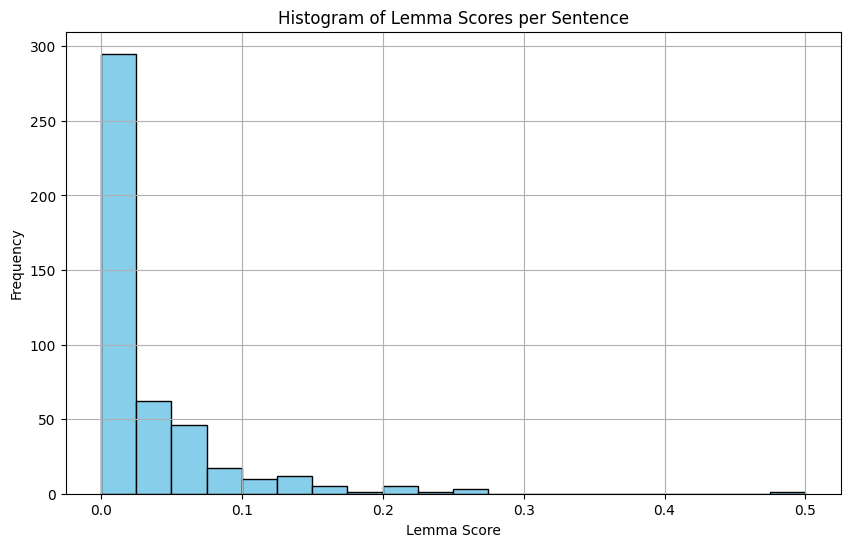

In [9]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the list of lemmatized words in the sentence (excluding punctuation and spaces)
    lemmata = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for lemma in lemmata if lemma in interesting_lemmas)
    
    # Return the ratio of interesting lemmas to total words in the sentence
    return lemma_count / len(lemmata) if len(lemmata) > 0 else 0

# Example frequent lemmas (replace with actual output from question 4)
interesting_lemmas = ['laser', 'light', 'headlight', 'technology', 'use']

# Load the article HTML from the pickle file
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract plain text from the HTML
article_text = soup.get_text()

# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# List to store the lemma-based scores for each sentence
lemma_scores = [score_sentence_by_lemma(str(sentence), interesting_lemmas) for sentence in sentences]

# Plotting the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Lemma Scores per Sentence')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Most common range of scores:
# Based on the histogram, most sentences will likely have lemma scores between 0 and 0.1, with some having higher scores.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).